Load the libraries

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure
import re
import nltk
import nltk
import math  # Import the math module
from sklearn.preprocessing import StandardScaler
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


Import the training dataset

In [68]:
import os
for dirname, _, filenames in os.walk('./data_scrapped'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data_scrapped\Data-test.csv
./data_scrapped\Data-train.csv
./data_scrapped\data.csv
./data_scrapped\test\neg\22144_2.txt
./data_scrapped\test\neg\22145_3.txt
./data_scrapped\test\neg\22146_1.txt
./data_scrapped\test\neg\22151_4.txt
./data_scrapped\test\neg\22152_1.txt
./data_scrapped\test\neg\22156_2.txt
./data_scrapped\test\pos\2666_9.txt
./data_scrapped\test\pos\2667_7.txt
./data_scrapped\test\pos\2669_10.txt
./data_scrapped\test\pos\2670_8.txt
./data_scrapped\train\neg\2073_2.txt
./data_scrapped\train\neg\2073_2_4.txt
./data_scrapped\train\neg\2076_4.txt
./data_scrapped\train\neg\2076_4_4.txt
./data_scrapped\train\neg\2078_2.txt
./data_scrapped\train\neg\2078_2_2.txt
./data_scrapped\train\neg\2084_4.txt
./data_scrapped\train\neg\2084_4_2.txt
./data_scrapped\train\pos\1863_7.txt
./data_scrapped\train\pos\1863_7_9.txt
./data_scrapped\train\pos\1867_8.txt
./data_scrapped\train\pos\1867_8_9.txt
./data_scrapped\train\pos\1870_10.txt
./data_scrapped\train\pos\1870_10_9.txt
./data_scrapp

In [69]:
df = pd.read_csv('./data_scrapped/Data-train.csv')

In [70]:
df.head()

,Review,Sentiment
0,"['I never saw the original, I\'m not a Denzel ...",Positive
1,"['I never saw the original, I\'m not a Denzel ...",Positive
2,['I had never heard of the Fear Street books b...,Positive
3,['I had never heard of the Fear Street books b...,Positive
4,['A totally amazing film by Director Quentin T...,Positive



This code creates a countplot to visualize the distribution of sentiment labels in the DataFrame df

C:\Users\HP\AppData\Local\Temp\ipykernel_17276\3487484129.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


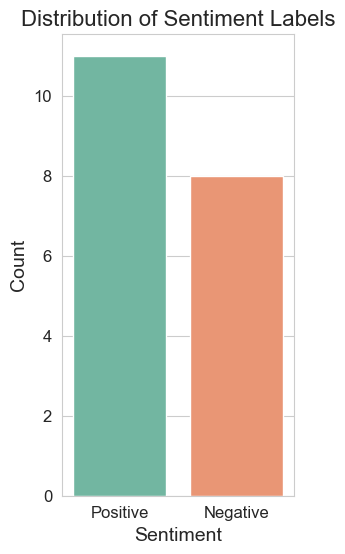

In [71]:
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(3, 6))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title('Distribution of Sentiment Labels', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

This function generates subplots to visualize the distribution of values in each column of a DataFrame.

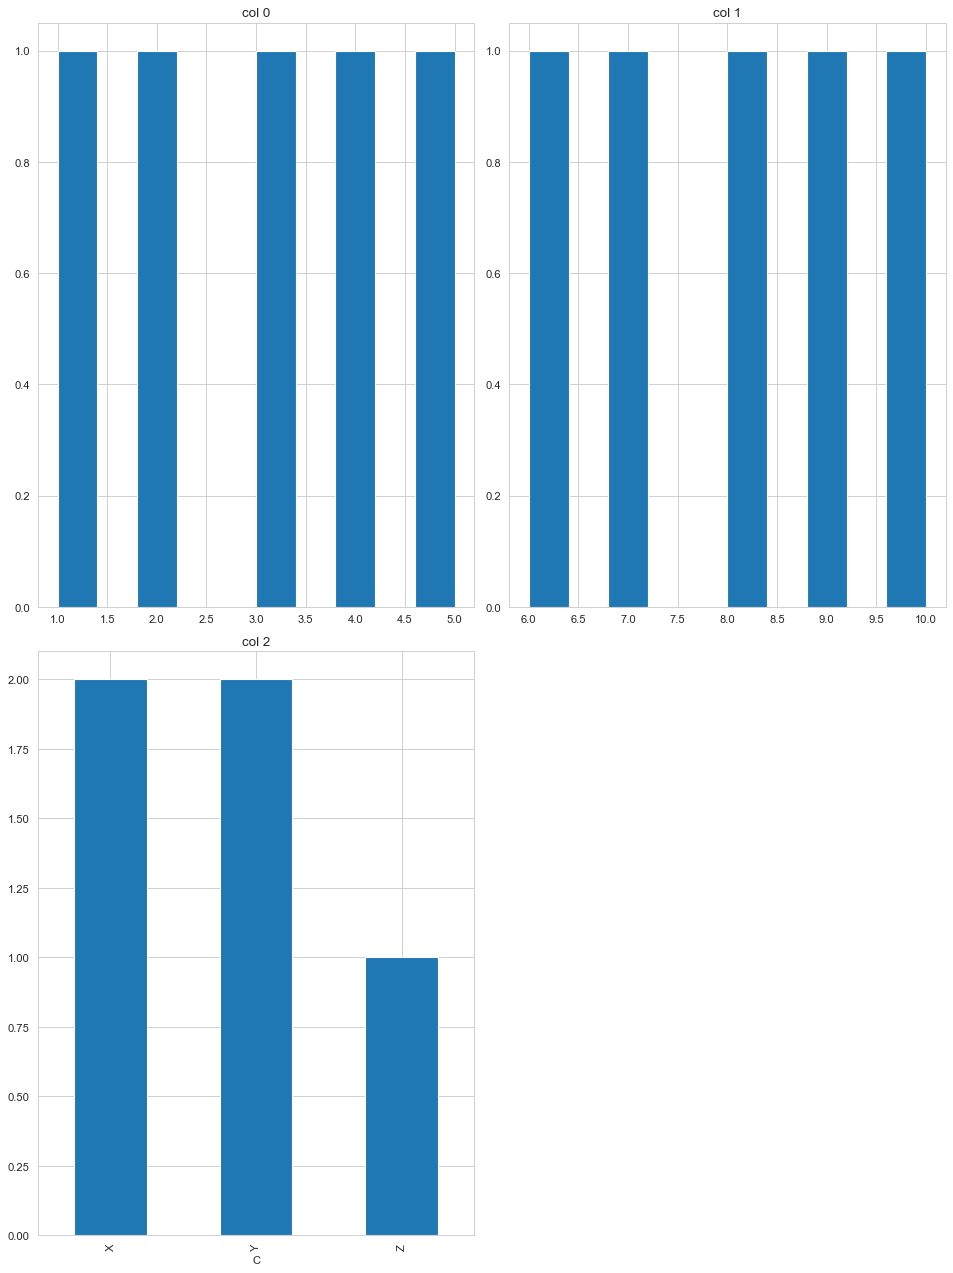

In [72]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nCol = df.shape[1]
    nGraphRow = math.ceil(nCol / nGraphPerRow)
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.title(f'col {i}')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

# Example usage
data = {'A': [1, 2, 3, 4, 5],
        'B': [6, 7, 8, 9, 10],
        'C': ['X', 'Y', 'Z', 'X', 'Y']}
df = pd.DataFrame(data)
plotPerColumnDistribution(df, 3, 2)


This code reads a CSV file containing IMDb dataset, displays the number of rows and columns in the dataset, and then generates scatter plots, density plots, and correlation matrices to visualize the data distribution and relationships between numerical columns in the dataset.

In [74]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# IMDB Dataset.csv has 50000 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('./data_scrapped/Data-train.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = './data_scrapped/Data-train.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 19 rows and 2 columns


In [75]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [11]:

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_17276\2328565414.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


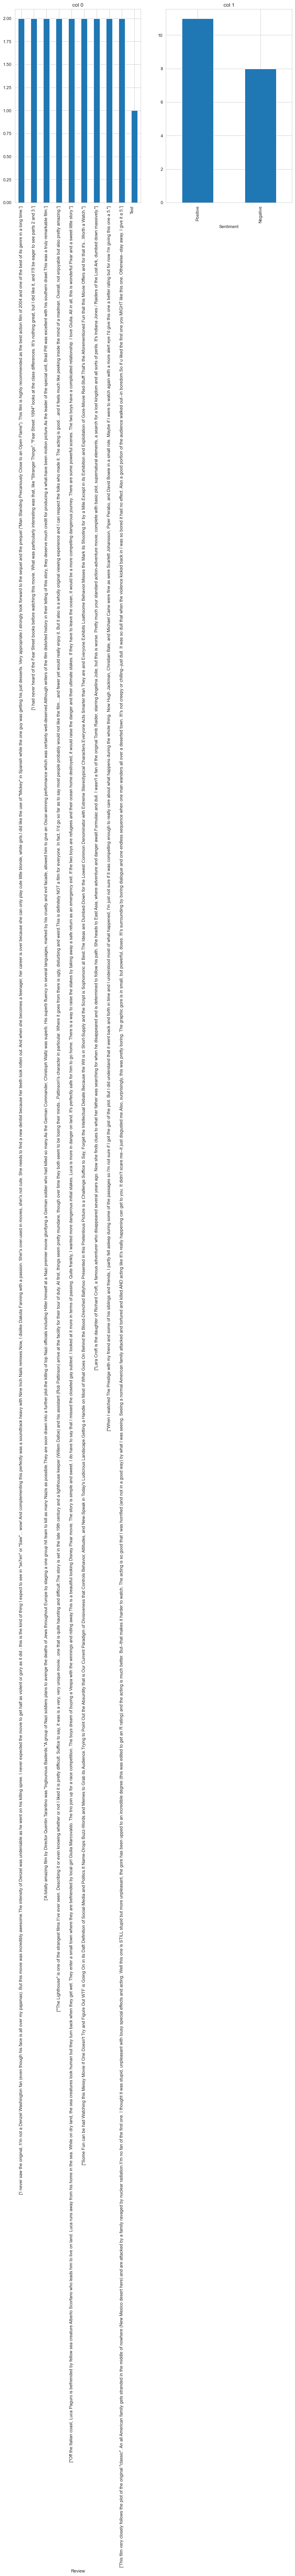

In [76]:
plotPerColumnDistribution(df1, 10, 5)

This code preprocesses text data by converting it to lowercase, removing HTML tags, URLs, non-alphabetic characters, and stopwords, returning the preprocessed text.

In [78]:
df = pd.read_csv('./data_scrapped/Data-train.csv')

In [79]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub('<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = ' '.join([word for word in text.split() if word not in set(stopwords.words('english'))])  # Remove stopwords
    return text

In [80]:
df['Review'] = df['Review'].apply(preprocess_text)

Removing the punctuation

In [81]:
import string
string.punctuation
exclude = string.punctuation

def remove_punc(text):
  for char in exclude:
    text= text.replace(char, '')
  return text
df['Review'] = df['Review'].apply(remove_punc)

In [82]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

This code removes stopwords from the 'Review' column of the DataFrame `df` containing text data.

In [83]:
stop = stopwords.words('english')
df['Review']= df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
df

,Review,Sentiment
0,never saw original denzel washington fan even ...,Positive
1,never saw original denzel washington fan even ...,Positive
2,never heard fear street books watching movie p...,Positive
3,never heard fear street books watching movie p...,Positive
4,totally amazing film director quentin tarantin...,Positive
5,totally amazing film director quentin tarantin...,Positive
6,lighthouse one strangest films ever seen descr...,Positive
7,lighthouse one strangest films ever seen descr...,Positive
8,italian coast luca paguro befriended fellow se...,Positive
9,italian coast luca paguro befriended fellow se...,Positive


In [84]:
df['Sentiment'].value_counts()

Sentiment
Positive    11
Negative     8
Name: count, dtype: int64

In [85]:
df.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [86]:
df.duplicated().sum()

9

In [87]:
df.drop_duplicates(inplace=True)

In [88]:
X= df.iloc[:,0:1]
y= df['Sentiment']

Label Encoding

In [89]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y= encoder.fit_transform(y)

In [93]:
train_df = pd.read_csv('./data_scrapped/Data-train.csv')

Load the testing data

In [113]:

test_df = pd.read_csv('./data_scrapped/Data-test.csv')

Text preprocessing (assuming preprocess_text function is defined)

In [114]:

train_df['Review'] = train_df['Review'].apply(preprocess_text)
test_df['Review'] = test_df['Review'].apply(preprocess_text)

Train-test split

In [115]:

X_train = train_df['Review']
y_train = train_df['Sentiment']
X_test = test_df['Review']
y_test = test_df['Sentiment']

In [116]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

Model training: Random Forest Classifier

In [117]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

Prediction and evaluation

In [118]:

y_pred_train = rf_classifier.predict(X_train_tfidf)
y_pred_test = rf_classifier.predict(X_test_tfidf)


In [119]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [120]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [122]:
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 1.0
Test Accuracy: 0.4


In [123]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[0 6]
 [0 4]]


Plotting predictions and validation

In [124]:

plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

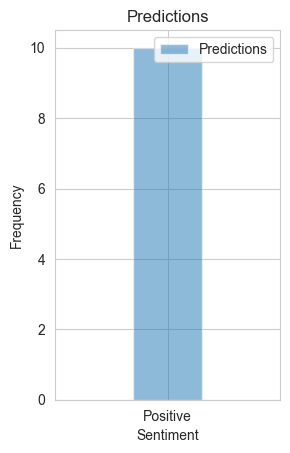

In [125]:
# Plotting predictions
plt.subplot(1, 2, 1)
plt.hist(y_pred_test, bins=3, alpha=0.5, label='Predictions')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Predictions')
plt.legend()

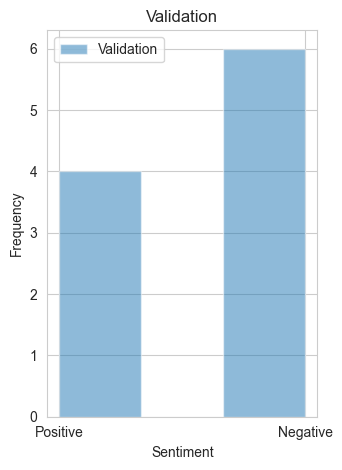

In [126]:
# Plotting validation
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=3, alpha=0.5, label='Validation')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Validation')
plt.legend()
plt.tight_layout()
plt.show()

Define function to extract additional features

In [127]:
def extract_additional_features(text):
    # Count of uppercase letters
    uppercase_count = sum(1 for c in text if c.isupper())
    # Count of digits
    digit_count = sum(1 for c in text if c.isdigit())
    # Count of special characters
    special_char_count = sum(1 for c in text if not c.isalnum())
    # Count of unique words
    unique_words_count = len(set(text.split()))
    # Count of repeated characters
    repeated_char_count = sum(1 for i in range(len(text)-1) if text[i] == text[i+1])
    # Average sentence length
    sentences = sent_tokenize(text)
    avg_sentence_length = np.mean([len(word_tokenize(sent)) for sent in sentences])
    return uppercase_count, digit_count, special_char_count, unique_words_count, repeated_char_count, avg_sentence_length


In [128]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [129]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [130]:
# Apply feature extraction
df['Uppercase_Count'], df['Digit_Count'], df['Special_Char_Count'], df['Unique_Words_Count'], df['Repeated_Char_Count'], df['Avg_Sentence_Length'] = zip(*df['Review'].apply(extract_additional_features))


In [131]:
# Split the dataset into features and target
X = df[['Review', 'Uppercase_Count', 'Digit_Count', 'Special_Char_Count', 'Unique_Words_Count', 'Repeated_Char_Count', 'Avg_Sentence_Length']]
y = df['Sentiment']

In [132]:
X

,Review,Uppercase_Count,Digit_Count,Special_Char_Count,Unique_Words_Count,Repeated_Char_Count,Avg_Sentence_Length
0,never saw original denzel washington fan even ...,0,0,95,87,17,96.0
2,never heard fear street books watching movie p...,0,0,22,20,7,23.0
4,totally amazing film director quentin tarantin...,0,0,87,80,14,88.0
6,lighthouse one strangest films ever seen descr...,0,0,92,81,21,93.0
8,italian coast luca paguro befriended fellow se...,0,0,114,89,13,115.0
10,text,0,0,0,1,0,1.0
11,fun watching messy movie one try figure wtf go...,0,0,88,84,18,89.0
13,lara croft daughter richard croft famous adven...,0,0,57,54,7,58.0
15,watched prestige friend siblings friends partl...,0,0,52,51,12,53.0
17,film closely follows plot original classic ame...,0,0,114,91,29,115.0
